
--- Fold 1 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.2412
Accuracy: 0.9147
Weighted Precision: 0.9197
Weighted Recall: 0.9052
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

Class-wise Metrics:
           Class  Precision   Recall  F1 Score
    glioma_tumor   0.911111 0.881720  0.896175
meningioma_tumor   0.860000 0.919786  0.888889
        no_tumor   0.915493 0.812500  0.860927
 pituitary_tumor   0.978022 0.988889  0.983425


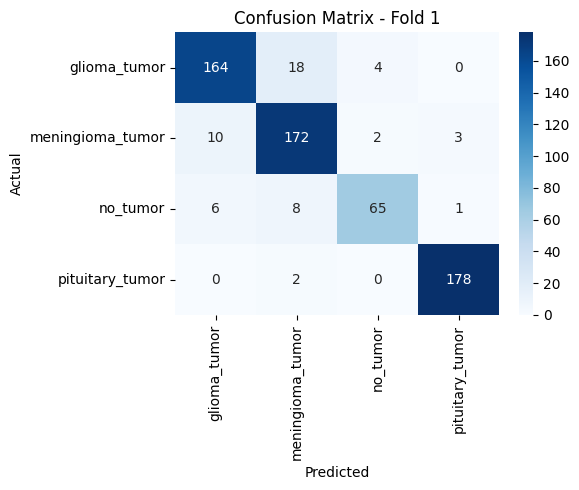


--- Fold 2 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.3488
Accuracy: 0.8910
Weighted Precision: 0.9051
Weighted Recall: 0.8736
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step

Class-wise Metrics:
           Class  Precision   Recall  F1 Score
    glioma_tumor   0.879121 0.864865  0.871935
meningioma_tumor   0.857895 0.867021  0.862434
        no_tumor   0.860759 0.850000  0.855346
 pituitary_tumor   0.950549 0.961111  0.955801


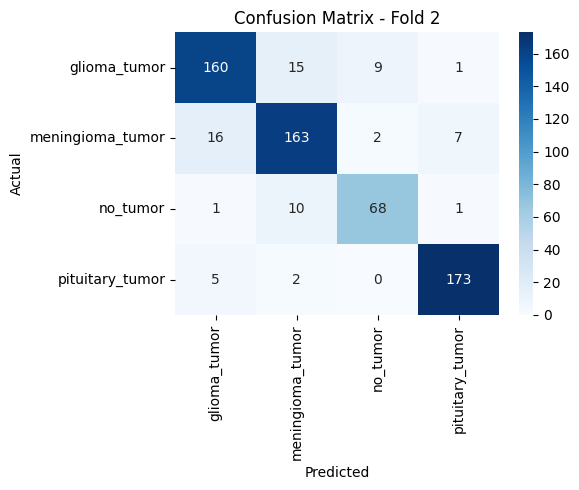


--- Fold 3 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.3674
Accuracy: 0.8942
Weighted Precision: 0.9061
Weighted Recall: 0.8847
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step

Class-wise Metrics:
           Class  Precision   Recall  F1 Score
    glioma_tumor   0.925000 0.800000  0.857971
meningioma_tumor   0.842857 0.941489  0.889447
        no_tumor   0.853333 0.810127  0.831169
 pituitary_tumor   0.941489 0.977901  0.959350


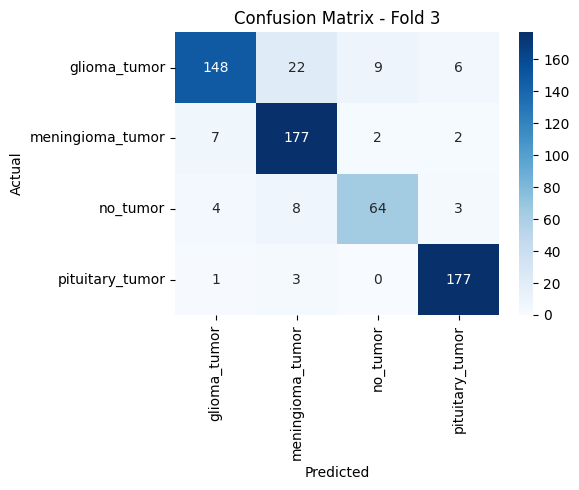


--- Fold 4 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.3581
Accuracy: 0.8972
Weighted Precision: 0.9018
Weighted Recall: 0.8861
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

Class-wise Metrics:
           Class  Precision   Recall  F1 Score
    glioma_tumor   0.941520 0.870270  0.904494
meningioma_tumor   0.848168 0.866310  0.857143
        no_tumor   0.851852 0.862500  0.857143
 pituitary_tumor   0.925926 0.972222  0.948509


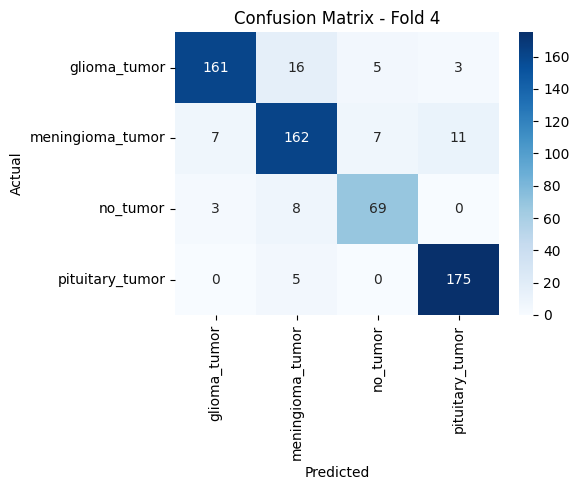


--- Fold 5 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.4112
Accuracy: 0.8750
Weighted Precision: 0.8819
Weighted Recall: 0.8623
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

Class-wise Metrics:
           Class  Precision   Recall  F1 Score
    glioma_tumor   0.861111 0.837838  0.849315
meningioma_tumor   0.819588 0.850267  0.834646
        no_tumor   0.868421 0.825000  0.846154
 pituitary_tumor   0.950549 0.961111  0.955801


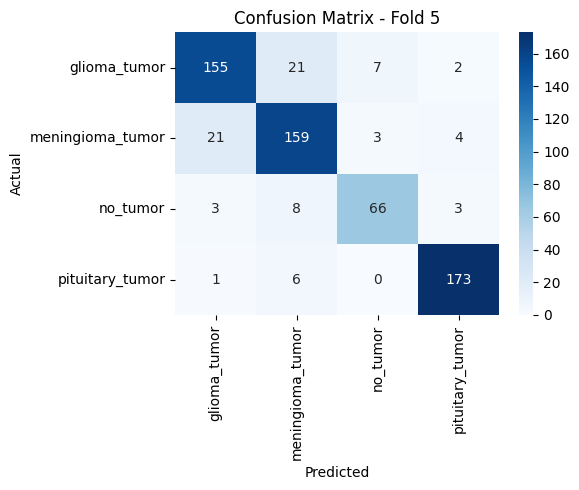


Average Results over 5 folds:
Loss: 0.3453 ± 0.0563
Accuracy: 0.8944 ± 0.0127
Weighted Precision: 0.9029 ± 0.0122
Weighted Recall: 0.8824 ± 0.0143

Class labels:
0 = glioma_tumor
1 = meningioma_tumor
2 = no_tumor
3 = pituitary_tumor


In [1]:
# Cross-Validation


import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def load_images_from_folder(folder_path, img_size=128):
    X, y = [], []
    labels = [label for label in sorted(os.listdir(folder_path)) if os.path.isdir(os.path.join(folder_path, label))]
    label_map = {label: idx for idx, label in enumerate(labels)}

    for label in labels:
        class_folder = os.path.join(folder_path, label)
        for file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(label_map[label])
            except:
                continue

    X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0
    y = np.array(y)
    return X, y, label_map

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
    )
    return model

# Cross-validation
data_path = "Tumor"
X, y, label_map = load_images_from_folder(data_path)
num_classes = len(label_map)
y_cat = to_categorical(y, num_classes=num_classes)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
all_scores = []

for train_index, test_index in kf.split(X, y):
    print(f"\n--- Fold {fold} ---")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]

    model = create_model((128, 128, 1), num_classes)

    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=16,
        callbacks=[early_stop],
        verbose=0
    )

    results = model.evaluate(X_test, y_test, verbose=0)
    print(f"Loss: {results[0]:.4f}")
    print(f"Accuracy: {results[1]:.4f}")
    print(f"Weighted Precision: {results[2]:.4f}")
    print(f"Weighted Recall: {results[3]:.4f}")
    all_scores.append(results)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    precision_per_class = precision_score(y_true, y_pred, average=None)
    recall_per_class = recall_score(y_true, y_pred, average=None)
    f1_per_class = f1_score(y_true, y_pred, average=None)

    metrics_df = pd.DataFrame({
        'Class': list(label_map.keys()),
        'Precision': precision_per_class,
        'Recall': recall_per_class,
        'F1 Score': f1_per_class
    })
    print("\nClass-wise Metrics:")
    print(metrics_df.to_string(index=False))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fold += 1

print("\nAverage Results over 5 folds:")
all_scores = np.array(all_scores)
metrics = ['Loss', 'Accuracy', 'Weighted Precision', 'Weighted Recall']
for i, metric in enumerate(metrics):
    print(f"{metric}: {np.mean(all_scores[:, i]):.4f} ± {np.std(all_scores[:, i]):.4f}")

print("\nClass labels:")
for label, idx in sorted(label_map.items(), key=lambda x: x[1]):
    print(f"{idx} = {label}")